### Keras
https://keras.io/

Created by: [François Chollet](https://fchollet.com/)

### Fashion MNIST
#### Prepare the data
- Reference: https://keras.io/api/datasets/fashion_mnist/

- ```x_train```: NumPy array of grayscale image data: shapes **(60000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(60000,)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 28, 28)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000,)**

- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [25]:
import tensorflow
from tensorflow import keras

(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [27]:
num_classes = 10

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

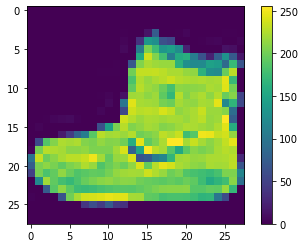

In [28]:
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

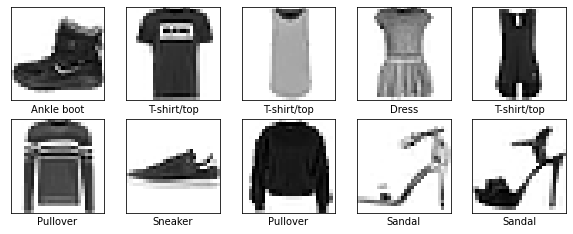

In [29]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [30]:
# Normalizing pixels
# pixel goes from 0 to 255, then divided to 255 so we have it goes from 0 to 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
60000 train samples
10000 test samples


### Build the model

In [31]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), 
    keras.layers.Dense(256,activation="relu"),
    keras.layers.Dense(64,activation="relu"),
    # bai toan nhieu hon 2 label thi dung softmax de phan loai
    keras.layers.Dense(num_classes,activation="softmax")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [32]:
# chia nho data dau vao
# VD: input la 128 buc hinh => chia thanh 2 batch gom 64 buc hinh
batch_size = 64

epochs = 15

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])

### Evaluate the trained model

In [33]:
score = model.evaluate(x_test, y_test)

print(f"Loss: {score[0]}")
print(f"Accuracy: {score[1]}")

313/313 [==============================] - 1s 2ms/step - loss: 2.3832 - accuracy: 0.0538
Loss: 2.3831748962402344
Accuracy: 0.05380000174045563


In [34]:
predictions = model.predict(x_test)

In [36]:
import numpy as np

def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

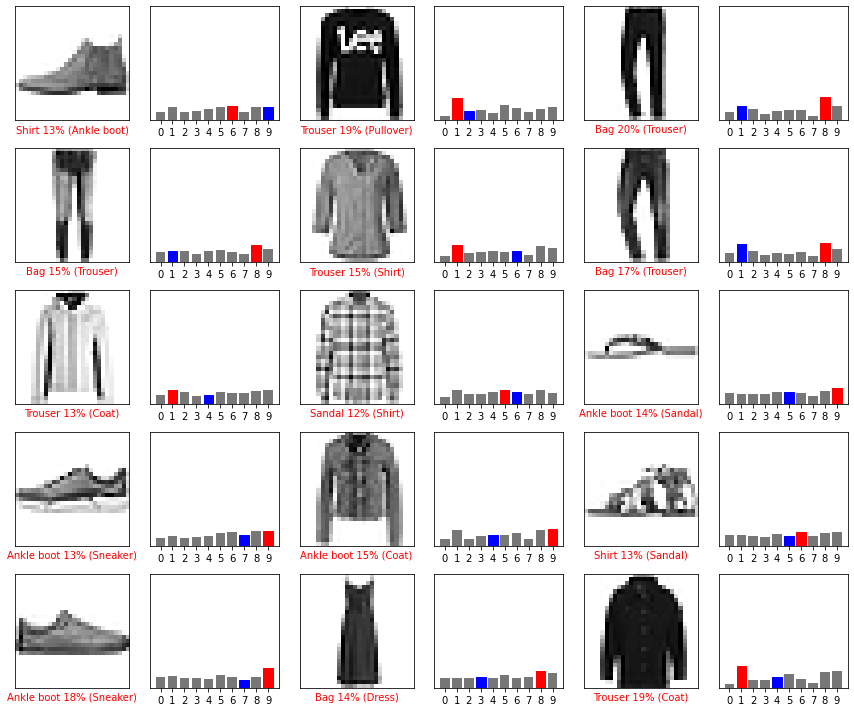

In [37]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

### CIFAR-10
#### Prepare the data
- ```x_train```: NumPy array of grayscale image data: shapes **(50000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_train```: NumPy array of digit labels (integers in range 0-9): shape **(50000, 1)**.

- ```x_test```: NumPy array of grayscale image data: shapes **(10000, 32, 32, 3)**. Pixel values range from **0 to 255**.

- ```y_test```: NumPy array of digit labels (integers in range 0-9): shape **(10000, 1)**.

- 0	airplane
- 1	automobile
- 2	bird
- 3	cat
- 4	deer
- 5	dog
- 6	frog
- 7	horse
- 8	ship
- 9	truck

In [38]:
num_classes = 10

(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [39]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

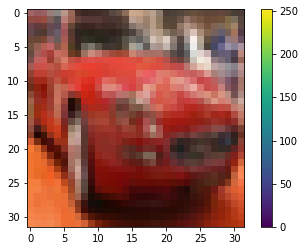

In [40]:
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()

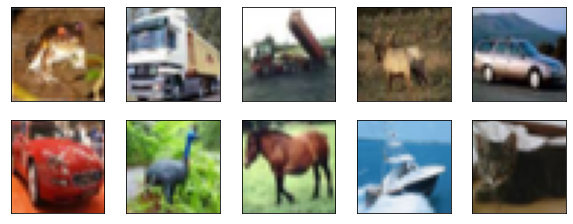

In [41]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
plt.show()

In [42]:
# Normalizing pixels
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)
50000 train samples
10000 test samples


### Build the model

In [43]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32, 32, 3)), #RGB : Red Green Blue
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax')
])

model.summary()
# 32 x 32 x 3 = 3072
# (3072 + 1 (bias)) x 256 = 786688
# (256 + 1 (bias)) x 64 = 16448
# (64 + 1 (bias)) x 10 = 650

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 256)               786688    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                650       
Total params: 803,786
Trainable params: 803,786
Non-trainable params: 0
_________________________________________________________________


### Train the model

In [44]:
batch_size = 64
epochs = 15

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
704/704 [==============================] - 6s 9ms/step - loss: 1.8989 - accuracy: 0.3175 - val_loss: 1.7660 - val_accuracy: 0.3644
Epoch 2/15
704/704 [==============================] - 6s 8ms/step - loss: 1.7078 - accuracy: 0.3881 - val_loss: 1.6928 - val_accuracy: 0.3986
Epoch 3/15
704/704 [==============================] - 7s 10ms/step - loss: 1.6367 - accuracy: 0.4152 - val_loss: 1.6439 - val_accuracy: 0.4242
Epoch 4/15
704/704 [==============================] - 8s 12ms/step - loss: 1.5810 - accuracy: 0.4356 - val_loss: 1.5702 - val_accuracy: 0.4448
Epoch 5/15
704/704 [==============================] - 6s 8ms/step - loss: 1.5497 - accuracy: 0.4470 - val_loss: 1.5690 - val_accuracy: 0.4466
Epoch 6/15
704/704 [==============================] - 5s 7ms/step - loss: 1.5097 - accuracy: 0.4583 - val_loss: 1.5927 - val_accuracy: 0.4260
Epoch 7/15
704/704 [==============================] - 7s 10ms/step - loss: 1.4872 - accuracy: 0.4659 - val_loss: 1.5101 - val_accuracy: 0.4626
Epo

In [45]:
score = model.evaluate(x_test, y_test, verbose=2)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 - 1s - loss: 1.4828 - accuracy: 0.4689
Test loss: 1.4827992916107178
Test accuracy: 0.46889999508857727


In [46]:
prediction = model.predict(x_test)

In [47]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[np.max(true_label)],
                                color=color))

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[np.max(true_label)].set_color('blue')

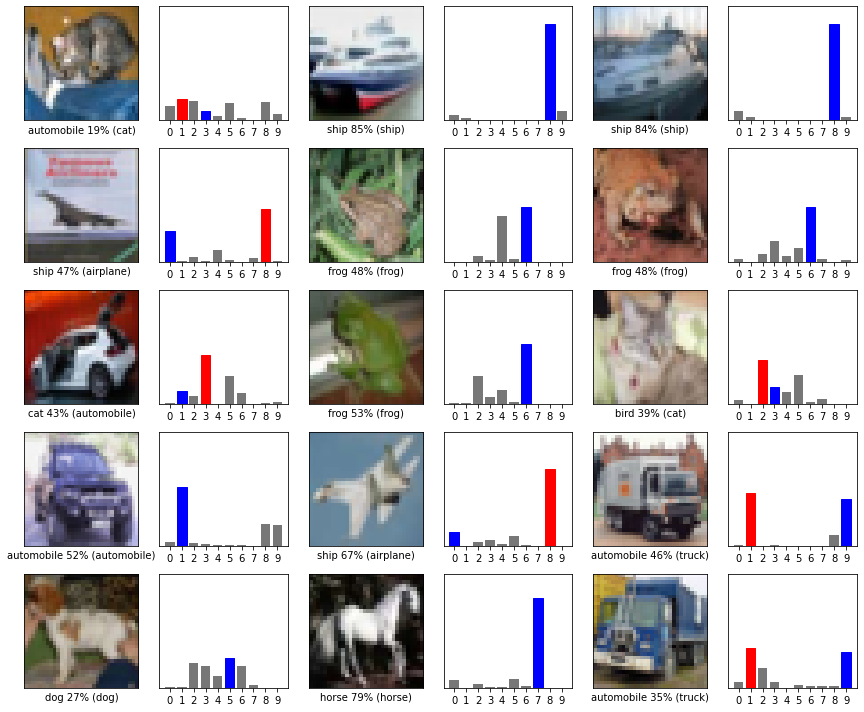

In [48]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, prediction[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, prediction[i], y_test)
plt.tight_layout()
plt.show()

In [49]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[439  16  95  35  12  43  28  22 285  25]
 [ 32 509  31  42   9  41  18  21 192 105]
 [ 58  12 440 101  70 113 115  37  46   8]
 [ 15  14 121 319  29 296 121  18  40  27]
 [ 41   7 259  59 293 113 121  43  54  10]
 [ 12   5 131 173  31 490  77  30  43   8]
 [  5   7 135 105  68  80 552  16  26   6]
 [ 37   3 117  69  77 151  35 437  38  36]
 [ 52  31  11  18  15  50  14   9 772  28]
 [ 35 138  25  54  10  37  28  32 203 438]]


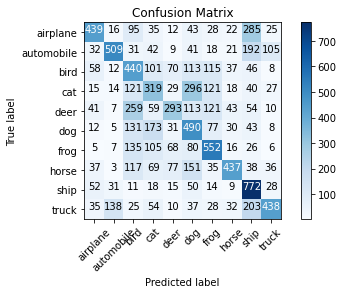

In [50]:
from sklearn.metrics import classification_report, confusion_matrix
matrix = confusion_matrix(y_test, prediction.argmax(axis=1))
plot_confusion_matrix(cm=matrix, classes=class_names, title='Confusion Matrix')